# UMAP LEARN

## Plan

* Supervised and unupervised analysis on pulmonary carcinoid data :
    * Graph
    * Local neighborhood
    * Clustering Kmean - Dbscan - KNN ?
* Unsupervised analysis on pulmonary carcinoid data :
    * Graph
    * Local neighborhood
    * Clustering Kmean - Dbscan - KNN ?
    
*  Unsupervised analysis on pulmonary carcinoid data and PCA:

## Librairies

In [30]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib 
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
import umap
import math
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score , recall_score , silhouette_score
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist


In [32]:
import jaccard_set_distance.py

TabError: inconsistent use of tabs and spaces in indentation (jaccard_set_distance.py, line 154)

## Import data 
* `data_lv_50_type` is the expression data frame of 6399 genes which have the largest variance for samples whose type is Atypical, Typical, or LCNEC

In [12]:
data_lv_50_type3 =  pd.read_csv("t_data_vst_50_type_3class.tsv", sep="\t")
data_lv_50_type3.shape

(152, 6400)

**Set labels**

In [19]:
lv_50_type = data_lv_50_type3.iloc[:,6399]
typeN  = []
for i in range(len(lv_50_type)):
    if lv_50_type[i]== 'Atypical':
        typeN.append(1)
    elif lv_50_type[i]== 'Typical':
        typeN.append(2)
    elif lv_50_type[i]== 'LCNEC':
        typeN.append(3)
    else :
        print("WARNING i = ", i)
        break


In [27]:
typeN

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 3,
 2,
 1,
 3,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 1,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 1]

## Effect of supervised analysis

### Graphical experiment

#### Unsupervised Dimensionality Reduction

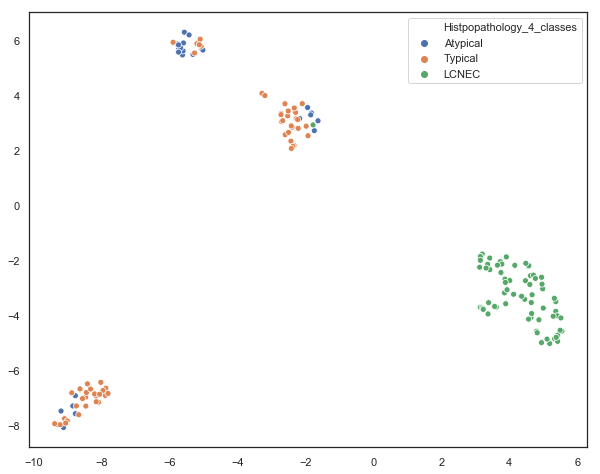

In [24]:
sns.set(style='white', rc={'figure.figsize':(10,8)})
lv_50_data = data_lv_50_type3.iloc[:,1:6398]
#lv_50_type = data_lv_50_type3.iloc[:,6399]
standard_embedding = umap.UMAP().fit_transform(lv_50_data)
sns.scatterplot(x=standard_embedding[:, 0], y=standard_embedding[:, 1],  hue=lv_50_type)
plt.show()

#### Supervised Dimensionality Reduction

In [21]:
embedding = umap.UMAP().fit_transform(lv_50_data, y=typeN)

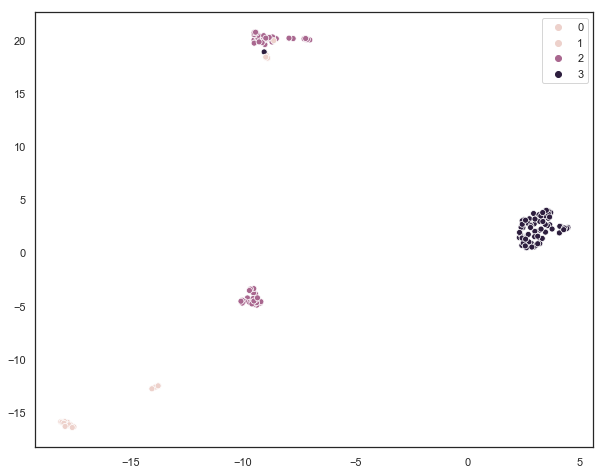

In [25]:
sns.set(style='white', rc={'figure.figsize':(10,8)})
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1],  hue=typeN)
plt.show()

**Legend complement :**
* 

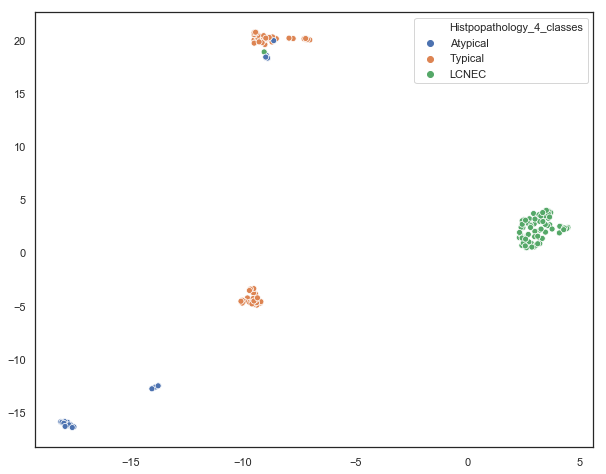

In [26]:
sns.set(style='white', rc={'figure.figsize':(10,8)})
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1],  hue=lv_50_type)
plt.show()

**Remark : New cluster of typical**

### Neighborhood preservation